<a href="https://colab.research.google.com/github/lucastanger/realestate_investment_analysis/blob/main/realestate_investment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Prüfungsleistung

*   MatNr: 7474265
*   MatNr: **TODO**



In [1]:
# Necessary imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import urllib

%matplotlib inline

# Receive data from url

Dataset avaiable from https://raw.githubusercontent.com/lucastanger/realestate_investment_analysis/main/Data.csv?token=AJLCGMZNUCOBDGDLRVPY54S7UWKXQ


In [5]:
# Read CSV Data

# data = pd.read_csv('/Users/stang/Downloads/Data.csv', sep=";", encoding="iso-8859-1")
d = urllib.request.urlopen('https://raw.githubusercontent.com/lucastanger/realestate_investment_analysis/main/Data.csv?token=AJLCGMZNUCOBDGDLRVPY54S7UWKXQ')

data = pd.read_csv(d, sep=";", encoding="iso-8859-1")


In [6]:
# Initial data overview
# N = 2000 => datapoints (rows)
# p = 28 => dimensions (cols)

# Goal: Forecast of valuable real estate investments
# Inference: **TODO**
data

,Grundstück in qm,Grundstücksform,Steigung,Bezirk,Zone,Lage,Typ,Zustand,Gebaut,Renoviert,Zustand Fassade,Kellerfläche in qm,Heizung,Heizungsqualität,Klimaanlage,Erster Stock in qm,Zweiter Stock in qm,Wohnfläche in qm,Schlafzimmer,Küchen,Küchenqualität,Räume,Garage Typ,Garagenkapazitt,Pool,Verkaufsmonat,Verkaufsjahr,Preis
0,898,IR1,Nein,Somerset,RL,Norm,2Fam,4,2107,2107,3,183,GasA,Ty,Y,183,0,183,6,2,3,10,Anbau,2,NaN,8,2136,156500
1,1326,Reg,Nein,North East,RL,Norm,1Fam,5,2133,2133,3,122,GasA,Ex,Y,113,109,222,3,1,4,7,Anbau,3,NaN,1,2137,350000
2,725,Reg,Nein,Somerset,RL,Norm,1Fam,7,2096,2138,3,80,GasA,Ex,Y,83,0,83,3,1,4,5,Freistehend,1,NaN,6,2140,137900
3,725,Reg,Nein,Somerset West,RL,Norm,1Fam,5,2135,2135,3,83,GasA,Ex,Y,83,74,157,3,1,4,8,Anbau,2,NaN,4,2136,184000
4,697,Reg,Nein,Miller,RL,Norm,1Fam,5,2129,2129,3,92,GasA,Gut,Y,96,72,168,3,1,4,7,Anbau,2,NaN,6,2140,189000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1272,IR1,Nein,North East,RL,Norm,1Fam,5,2133,2134,3,146,GasA,Ex,Y,146,102,248,3,1,5,10,Eingebaut,3,NaN,3,2138,412500
1996,941,IR1,Nein,Miller,RL,Norm,1Fam,5,2134,2134,3,79,GasA,Ex,Y,79,69,148,3,1,4,7,Anbau,2,NaN,7,2139,195500
1997,1093,Reg,Nein,Grand Park,RL,Norm,1Fam,7,2040,2130,3,52,GasA,Gut,N,74,51,125,2,1,3,6,Freistehend,1,NaN,5,2137,112000
1998,1228,IR1,Nein,North East,RL,Norm,1Fam,5,2134,2134,3,132,GasA,Ex,Y,132,45,178,3,1,4,9,Eingebaut,3,NaN,2,2136,279000


Grundstück in qm


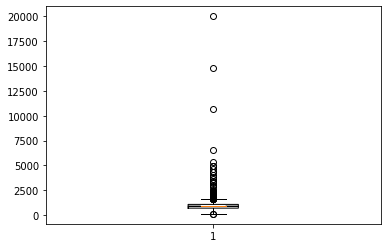

Zustand


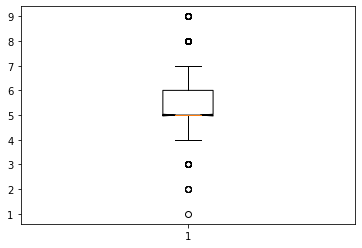

Gebaut


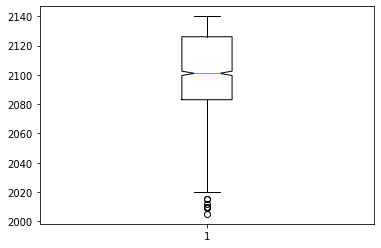

Renoviert


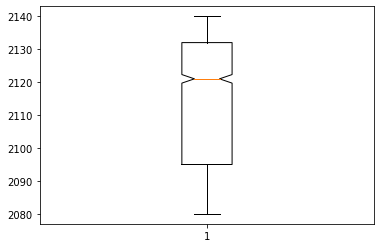

Zustand Fassade


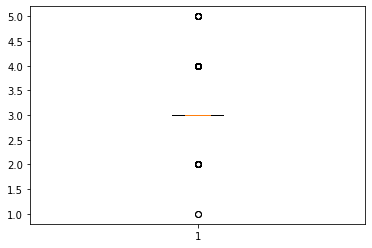

Kellerfläche in qm


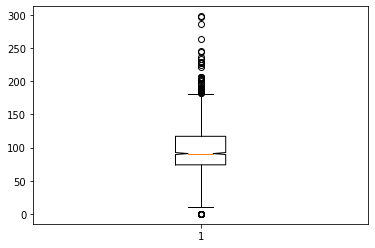

Erster Stock in qm


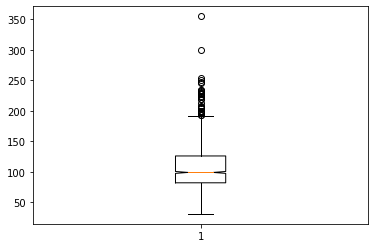

Zweiter Stock in qm


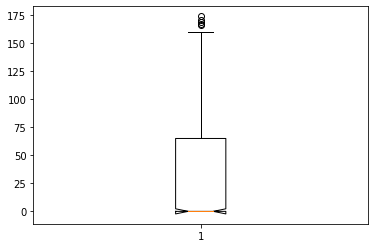

Wohnfläche in qm


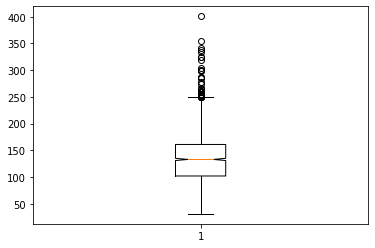

Schlafzimmer


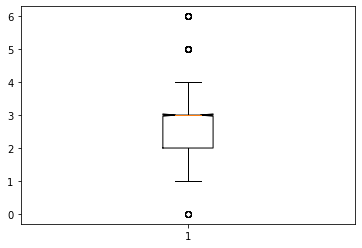

Küchen


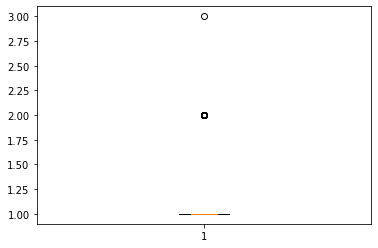

Küchenqualität


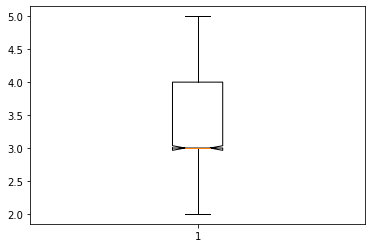

Räume


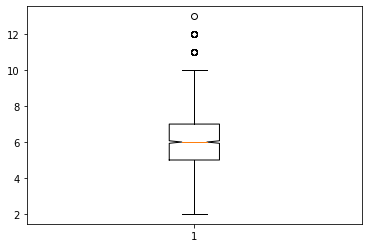

Garagenkapazitt


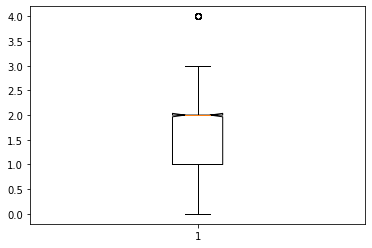

Verkaufsmonat


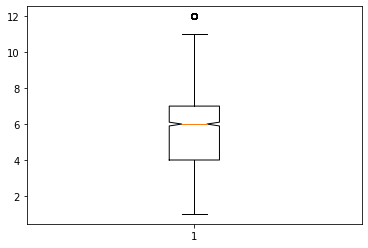

Verkaufsjahr


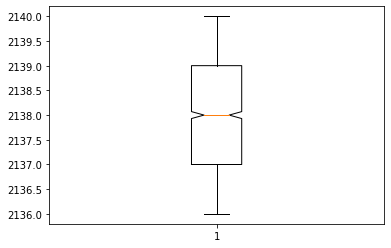

Preis


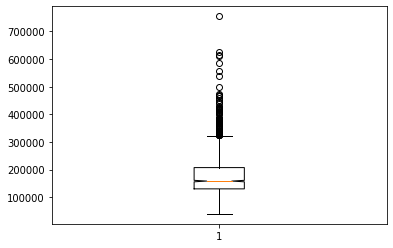

In [3]:
for col in data:
  if data[col].dtype == int:
    print(data[col].name)
    plt.boxplot(data[col], notch=True)
    plt.show()
  

In [ ]:
data

,Grundstück in qm,Grundstücksform,Steigung,Bezirk,Zone,Lage,Typ,Zustand,Gebaut,Renoviert,Zustand Fassade,Kellerfläche in qm,Heizung,Heizungsqualität,Klimaanlage,Erster Stock in qm,Zweiter Stock in qm,Wohnfläche in qm,Schlafzimmer,Küchen,Küchenqualität,Räume,Garage Typ,Garagenkapazitt,Pool,Verkaufsmonat,Verkaufsjahr,Preis
0,898,IR1,Nein,Somerset,RL,Norm,2Fam,4,2107,2107,3,183,GasA,Ty,Y,183,0,183,6,2,3,10,Anbau,2,NaN,8,2136,156500
1,1326,Reg,Nein,North East,RL,Norm,1Fam,5,2133,2133,3,122,GasA,Ex,Y,113,109,222,3,1,4,7,Anbau,3,NaN,1,2137,350000
2,725,Reg,Nein,Somerset,RL,Norm,1Fam,7,2096,2138,3,80,GasA,Ex,Y,83,0,83,3,1,4,5,Freistehend,1,NaN,6,2140,137900
3,725,Reg,Nein,Somerset West,RL,Norm,1Fam,5,2135,2135,3,83,GasA,Ex,Y,83,74,157,3,1,4,8,Anbau,2,NaN,4,2136,184000
4,697,Reg,Nein,Miller,RL,Norm,1Fam,5,2129,2129,3,92,GasA,Gut,Y,96,72,168,3,1,4,7,Anbau,2,NaN,6,2140,189000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1272,IR1,Nein,North East,RL,Norm,1Fam,5,2133,2134,3,146,GasA,Ex,Y,146,102,248,3,1,5,10,Eingebaut,3,NaN,3,2138,412500
1996,941,IR1,Nein,Miller,RL,Norm,1Fam,5,2134,2134,3,79,GasA,Ex,Y,79,69,148,3,1,4,7,Anbau,2,NaN,7,2139,195500
1997,1093,Reg,Nein,Grand Park,RL,Norm,1Fam,7,2040,2130,3,52,GasA,Gut,N,74,51,125,2,1,3,6,Freistehend,1,NaN,5,2137,112000
1998,1228,IR1,Nein,North East,RL,Norm,1Fam,5,2134,2134,3,132,GasA,Ex,Y,132,45,178,3,1,4,9,Eingebaut,3,NaN,2,2136,279000


In [ ]:
data['Renoviert'].hist(bins=60)
plt.show()

In [ ]:
corr_matrix = data.corr()
corr_matrix['Preis'].sort_values(ascending=False)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

imputer.fit(corr_matrix)

corr_matrix_i = imputer.transform(corr_matrix)

# corr_matrix_i = pd.DataFrame(corr_matrix_i)

In [ ]:
# sns.clustermap(data=corr_matrix_i, annot=True, cmap='Greens')

plt.subplots(figsize=(20,15))

ax = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True,
)

ax.set_xticklabels(
    data.columns,
    rotation=45,
    horizontalalignment='right'
)

In [ ]:
from matplotlib.collections import EllipseCollection

def plot_corr_ellipses(data, ax=None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

In [ ]:


fig, ax = plt.subplots(figsize=(30,25))
m = plot_corr_ellipses(corr_matrix, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
ax.margins(0.1)

In [ ]:
corr_matrix_i

In [ ]:
corr_matrix = data.corr()
corr_matrix.plot(figsize=(20,15))

In [ ]:
plt.scatter(x=data['Preis'], y=data['Grundstück in qm'], alpha=0.8)
plt.show()

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.scatterplot(x=data['Preis'], y=data['Wohnfläche in qm'], alpha=0.8, hue=data['Bezirk'])

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['Grundstück in qm', 'Gebaut', 'Renoviert', 'Kellerfläche in qm', 'Wohnfläche in qm', 'Räume', 'Preis', 'Verkaufsjahr']
scatter_matrix(data[attributes], figsize=(20,15), alpha=0.2)